In [1]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
data = pd.read_csv('/kaggle/input/real-or-fake-fake-jobposting-prediction/fake_job_postings.csv')

In [ ]:
data.head(2)

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [ ]:
data.drop(['department','salary_range','job_id'], axis=1, inplace=True)

In [ ]:
data.fillna(" ", inplace=True)

In [ ]:
data.head(2)

,title,location,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,Marketing Intern,"US, NY, New York","We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,,0,1,0,Other,Internship,,,Marketing,0
1,Customer Service - Cloud Video Production,"NZ, , Auckland","90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,,Marketing and Advertising,Customer Service,0


In [ ]:
data['job_description'] = data['title'] + ' ' + data['location'] + ' ' + data['company_profile'] + ' ' + data['description'] + ' ' + data['requirements'] + ' ' + data['benefits'] + ' ' + data['employment_type'] + ' ' + data['required_experience'] + ' ' + data['required_education'] + ' ' + data['industry'] + ' ' + data['function']

In [ ]:
data.drop(['title','location','company_profile','description','requirements','benefits','employment_type','required_experience','required_education','industry','function'], axis = 1, inplace= True)

In [ ]:
data.head(2)

,telecommuting,has_company_logo,has_questions,fraudulent,job_description
0,0,1,0,0,"Marketing Intern US, NY, New York We're Food52..."
1,0,1,0,0,"Customer Service - Cloud Video Production NZ, ..."


In [ ]:
data.reset_index(inplace= True)

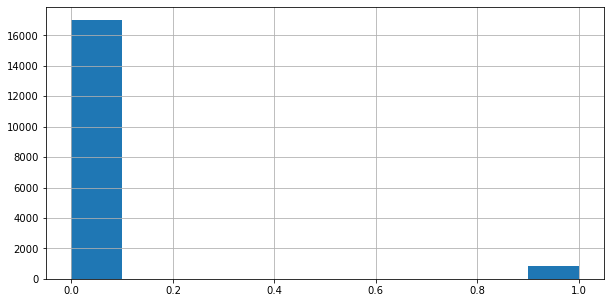

In [ ]:
data['fraudulent'].hist(figsize=(10,5))

In [ ]:
data['fraudulent'].value_counts()

0    17014
1      866
Name: fraudulent, dtype: int64

In [ ]:
import nltk
import re , string
from nltk.corpus import stopwords

In [ ]:

stop_words = set(stopwords.words('english'))
punctuations = set(string.punctuation)
stop_words.update(punctuations)

In [ ]:
# from nltk.stem import WordNetLemmatizer
# lemmatizer = WordNetLemmatizer()
# text = []
# for i in range(0, len(data['job_description'])):
#     clean_text = re.sub('[^a-zA-Z]', ' ', data['job_description'][i])
#     clean_text = clean_text.lower().split()
#     clean_text = [lemmatizer.lemmatize(word) for word in clean_text if not word in stop_words]
#     clean_text = ' '.join(clean_text)
#     text.append(clean_text)

In [ ]:
from nltk.stem.snowball import SnowballStemmer
lemmatizer = SnowballStemmer(language='english')
text = []
for i in range(0, len(data['job_description'])):
    clean_text = re.sub('[^a-zA-Z]', ' ', data['job_description'][i])
    clean_text = clean_text.lower().split()
    clean_text = [lemmatizer.stem(word) for word in clean_text if not word in stop_words]
    clean_text = ' '.join(clean_text)
    text.append(clean_text)

In [ ]:
text[0]

'market intern us ny new york food creat groundbreak award win cook site support connect celebr home cook give everyth need one place top editori busi engin team focus use technolog find new better way connect peopl around specif food interest offer superb high curat inform food cook attract talent home cook contributor countri also publish well known profession like mario batali gwyneth paltrow danni meyer partnership whole food market random hous food name best food websit jame beard foundat iacp featur new york time npr pando daili techcrunch today show locat chelsea new york citi food fast grow jame beard award win onlin food communiti crowd sourc curat recip hub current interview full part time unpaid intern work small team editor execut develop new york citi headquart reproduc repackag exist food content number partner site huffington post yahoo buzzfe various content manag systemsresearch blog websit provis food affili programassist day day affili program support screen affili a

In [ ]:

from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Bidirectional
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense


In [ ]:
voc_size=5000

In [ ]:
onehot_text=[one_hot(words,voc_size)for words in text]
onehot_text[0]

[4944,
 4002,
 4066,
 182,
 3546,
 3318,
 2209,
 3066,
 3940,
 1376,
 3013,
 4049,
 2403,
 4640,
 1254,
 3807,
 2574,
 4049,
 4583,
 1188,
 3120,
 67,
 3053,
 4214,
 2841,
 78,
 1154,
 2592,
 3809,
 1527,
 1826,
 293,
 3546,
 4749,
 2854,
 1254,
 1774,
 859,
 4205,
 2209,
 4631,
 2716,
 4076,
 2165,
 4085,
 2155,
 2209,
 4049,
 2801,
 1299,
 2574,
 4049,
 2008,
 2260,
 1794,
 4788,
 1105,
 2744,
 1361,
 3276,
 4375,
 1887,
 2372,
 4488,
 39,
 4288,
 1126,
 2445,
 2209,
 4944,
 3184,
 4337,
 2209,
 185,
 4702,
 2209,
 2428,
 4103,
 255,
 2880,
 1094,
 536,
 3546,
 3318,
 2660,
 4297,
 3681,
 226,
 4687,
 3878,
 4966,
 1276,
 69,
 3546,
 3318,
 4714,
 2209,
 2110,
 833,
 4103,
 255,
 1376,
 3013,
 2214,
 2209,
 2405,
 4149,
 4415,
 4085,
 2378,
 2154,
 1714,
 4814,
 1365,
 4920,
 2660,
 2787,
 4002,
 3318,
 4647,
 2592,
 2045,
 311,
 4733,
 3546,
 3318,
 4714,
 4267,
 3185,
 4077,
 364,
 2209,
 4902,
 4640,
 1737,
 2403,
 3849,
 3665,
 1869,
 4405,
 3647,
 4902,
 2723,
 4367,
 71,
 2428,

In [ ]:
sent_length=100
sent_with_same_lenght = pad_sequences(onehot_text,padding='post',maxlen=sent_length)
print(sent_with_same_lenght)

[[4365 4641 2306 ... 1292  416 4944]
 [1542 4928 4263 ... 4206 3843 2807]
 [3572 3614 2689 ... 1826 4248 4002]
 ...
 [1125  545 2343 ... 3836 1365 2660]
 [1405 2592 1389 ... 1532  392  392]
 [1100 2596 2187 ... 1384 4873 1154]]


In [ ]:
sent_with_same_lenght[0]

array([4365, 4641, 2306, 3462,  532, 1111, 4671, 3318, 2516, 2233, 2511,
       2038, 4733, 1586, 3168, 3400,  940, 4277, 4944,  311,  112, 2674,
       4902, 2723, 1741, 3874,  669,   71, 3630, 2792, 2209, 2841, 1820,
       4987, 2209, 3665,  609, 2574, 4049, 4049,  575, 2045, 3889,  658,
       3619, 2608,  233, 1172, 3815, 3530, 2493,  293, 4153, 1405, 1947,
       1400, 4819,  155, 4693, 2921, 3537, 4147,  580, 1389,  852,   94,
       3276, 2206, 4666, 2972,  586, 2336, 4401, 1221, 2209,  541, 4147,
       4162, 4827, 2775, 1894, 1679, 4647, 4438, 2323,  824, 4671, 4640,
       3636, 2930, 3318, 3246, 3559,  540, 3132, 3318, 2516, 1292,  416,
       4944], dtype=int32)

In [ ]:
#  model
embedding_vector_features=30 #80
model1=Sequential()
model1.add(Embedding(voc_size,embedding_vector_features,input_length=sent_length))
model1.add(Bidirectional(LSTM(150))) #combined two LSTM: one works from the start to the end, the second works from the end to the start  #90
model1.add(Dropout(0.40))
model1.add(Dense(1,activation='sigmoid'))
model1.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model1.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 30)           150000    
_________________________________________________________________
bidirectional (Bidirectional (None, 300)               217200    
_________________________________________________________________
dropout (Dropout)            (None, 300)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 301       
Total params: 367,501
Trainable params: 367,501
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
len(sent_with_same_lenght),data['fraudulent'].shape

(17880, (17880,))

In [ ]:
import numpy as np
X_final=np.array(sent_with_same_lenght)
y_final=np.array(data['fraudulent'])

In [ ]:
X_final[0]


array([4365, 4641, 2306, 3462,  532, 1111, 4671, 3318, 2516, 2233, 2511,
       2038, 4733, 1586, 3168, 3400,  940, 4277, 4944,  311,  112, 2674,
       4902, 2723, 1741, 3874,  669,   71, 3630, 2792, 2209, 2841, 1820,
       4987, 2209, 3665,  609, 2574, 4049, 4049,  575, 2045, 3889,  658,
       3619, 2608,  233, 1172, 3815, 3530, 2493,  293, 4153, 1405, 1947,
       1400, 4819,  155, 4693, 2921, 3537, 4147,  580, 1389,  852,   94,
       3276, 2206, 4666, 2972,  586, 2336, 4401, 1221, 2209,  541, 4147,
       4162, 4827, 2775, 1894, 1679, 4647, 4438, 2323,  824, 4671, 4640,
       3636, 2930, 3318, 3246, 3559,  540, 3132, 3318, 2516, 1292,  416,
       4944], dtype=int32)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.2, random_state=42)


In [ ]:
model1.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=15,batch_size=64)

Epoch 1/15
224/224 [==============================] - 46s 207ms/step - loss: 0.1875 - accuracy: 0.9528 - val_loss: 0.1145 - val_accuracy: 0.9662
Epoch 2/15
224/224 [==============================] - 45s 199ms/step - loss: 0.0848 - accuracy: 0.9762 - val_loss: 0.0988 - val_accuracy: 0.9720
Epoch 3/15
224/224 [==============================] - 46s 203ms/step - loss: 0.0570 - accuracy: 0.9835 - val_loss: 0.0978 - val_accuracy: 0.9729
Epoch 4/15
224/224 [==============================] - 45s 203ms/step - loss: 0.0358 - accuracy: 0.9894 - val_loss: 0.0989 - val_accuracy: 0.9746
Epoch 5/15
224/224 [==============================] - 48s 213ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.1139 - val_accuracy: 0.9712
Epoch 6/15
224/224 [==============================] - 46s 203ms/step - loss: 0.0137 - accuracy: 0.9959 - val_loss: 0.1221 - val_accuracy: 0.9754
Epoch 7/15
224/224 [==============================] - 46s 205ms/step - loss: 0.0080 - accuracy: 0.9976 - val_loss: 0.1231 - val_ac

In [ ]:
y_pred=model1.predict_classes(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[3360,   35],
       [  58,  123]])

In [ ]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9739932885906041

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      3395
           1       0.78      0.68      0.73       181

    accuracy                           0.97      3576
   macro avg       0.88      0.83      0.86      3576
weighted avg       0.97      0.97      0.97      3576



**References**

https://www.kaggle.com/madz2000/text-classification-using-keras-nb-97-accuracy

https://www.kaggle.com/gauravsahani/real-or-fake-job-postings-with-bi-directional-lstm